In [1]:
import matplotlib.pyplot as plt
import data
import utils

In [2]:
import ncvis
# ds = data.MNIST()
# ds = data.PenDigits()
# ds = data.COIL20()
# ds = data.COIL100()
ds = data.ScRNA()

vis = ncvis.NCVis(n_init_epochs=20, n_epochs=100, min_dist=0.3)

Loading 100% (27 of 27) |################| Elapsed Time: 0:00:28 Time:  0:00:28


In [3]:
%%time
Y = vis.fit(ds.X)

CPU times: user 17min 1s, sys: 1.99 s, total: 17min 3s
Wall time: 1min 34s


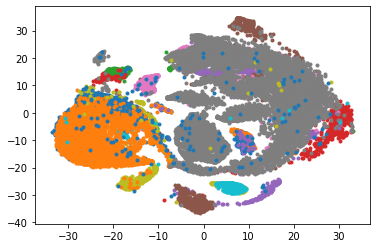

In [4]:
fig, ax = plt.subplots(1, 1)
utils.scatter_classes(Y, ds.y, ax, marker='.')
plt.show()